**Ad Ease** is an <mark>**ads and marketing based company**</mark> **`helping businesses elicit`** **maximum clicks @ minimum cost**. AdEase is an ad infrastructure to **help businesses promote themselves `easily, effectively, and economically.`** The interplay of 3 AI modules - Design, Dispense, and Decipher, come together to make it this an end-to-end 3 step process digital advertising solution for all.

You are working in the Data Science team of Ad ease **trying to understand the per page view report** for different wikipedia pages for 550 days, and **`forecasting the number of views so that you can predict and optimize the ad placement`** for your clients. You are provided with the data of 145k wikipedia pages and daily view count for each of them. **`Your clients belong to different regions and need data on how their ads will perform on pages in different languages.`**

Dataset:

https://drive.google.com/drive/folders/1mdgQscjqnCtdg7LGItomyK0abN6lcHBb

**`Data Dictionary:`**

**There are two csv files given**

**`train_1.csv:`** In the csv file, **each row corresponds to a particular article and each column corresponds to a particular date.** <mark>The values are the number of visits on that date.</mark>

The page name contains data in this format:

**SPECIFIC** **<mark>NAME _ LANGUAGE</mark>**`.wikipedia.org _`**<mark>ACCESS TYPE_</mark>**`ACCESS ORIGIN`

having information about the page name, the main domain, the device type used to access the page, and also the request origin(spider or browser agent)

**`Exog_Campaign_eng:`** This file contains data for the dates which had a campaign or significant event that could affect the views for that day. The data is just for pages in English.

There’s 1 for dates with campaigns and 0 for remaining dates. It is to be treated as an exogenous variable for models when training and forecasting data for pages in English

- **Concepts Tested:**

    - **<mark>Exploratory data analysis</mark>**
    - **<mark>Time Series forecasting- ARIMA, SARIMAX, and Prophet</mark>**

- **What does “good” look like?**

    - Importing the dataset and doing usual exploratory analysis steps like checking the structure & characteristics of the dataset
    - **<mark>Checking null values and understanding their reason.</mark>**
    - **Understanding the page name format and splitting it to get different information.**
    - **`Separating different values from it like title, language, access type, and access origin.`**
    - **Visualizing the data and getting inferences from them**
    - **<mark>Converting the data to a format that can be fed to the Arima model (Pivoting etc)</mark>**
    - **`Checking if the data is stationary`**
        - Dickey-Fuller test
    - **`Trying different methods for stationarity.`**
        - Decomposition of series.
        - Differencing the series.
    - **`Plotting the ACF and PACF plots`**
        - Give insights about the characteristics of the time series.
    - **`Modeling`**
        - **<mark>Creating and training the Arima model</mark>**
        - **`Getting the exogenous variable and using it to train a sarimax model`**
        - **<mark>Use facebook prophet for forecasting</mark>**
    - **`Finding a way(grid search / etc) to find the best params for at least 1 modeling approach.`**
    - **<mark>Defining functions for all of the tasks.</mark>**
    - **`Comparing results for all languages and creating inferences and recommendations from them`**
    - **The MAPE for previous batches has been in the range of <mark>4-8%</mark>**
    
- **Evaluation Criteria (100 points)**

    - Importing the dataset and doing usual exploratory analysis steps like checking the structure & characteristics of the dataset (10 points)
    - Exploratory Data Analysis (20 points)
        - Separating the data
        - Analyzing and visualizing the data
        - Getting inferences
    - Checking stationarity (20 points)
        - Formatting the data for the model
        - Dickey fuller test
        - Decomposition
        - Differencing
    - Creating model training and forecasting with ARIMA, SARIMAX (20 points)
        - ACF and PACF plot.
        - Training the model.
        - Forecasting for different languages/regions.
        - Plotting the final results
    - Forecasting with (20 points)
        - Facebook prophet
    - Creating a pipeline for working with multiple series (10 points)

- **Questionnaire:**

    1. Defining the problem statements and where can this and modifications of this be used?
    2. Write 3 inferences you made from the data visualizations
    3. What does the decomposition of series do?
    4. What level of differencing gave you a stationary series?
    5. Difference between arima, sarima & sarimax.
    6. Compare the number of views in different languages
    7. What other methods other than grid search would be suitable to get the model for all languages?

## Table of Contents

1. **[Import Libraries](#imp_lib)**
2. **[Read Data & Data Formatting](#read_data)**
    - 2.1 [Read data](#read_data)
    - 2.2 [Data formatting](#data_formatting)
    - 2.3 [Checking null values and understanding their reason](#check_null)
3. **[Exploratory Data Analysis](#eda)**
    - 3.1 [language: bar plot](#language_bar_plot)
    - 3.2 [access type: bar plot](#access_type_bar_plot)
    - 3.3 [access origin: plot](#access_origin_plot)
4. **[Converting the data to a format that can be fed to the Time-Series model](#pivot_data)**
    - 4.1 [Time Series plot: all 7 languages](#ts_plot_all_seven)
5. **[Stationarity Test: Checking if the data is stationary](#checking_stationary)**
6. **[Decomposition and Differencing the time-series.](#toc_6)**
    - 6.1 [Decomposition: time-series data "english"](#toc_6.1)
    - 6.2 [Differencing: time-series data "english"](#toc_6.2)
7. **[Plotting the ACF and PACF plots](#toc_7)**
8. **[Modeling](#toc_8)**
    - 8.1 [Train-Test-Split](#toc_8.1)
    - 8.2 [Creating and training the Arima model](#toc_8.2)
    - 8.3 [Getting the exogenous variable and using it to train a sarimax model](#toc_8.3)
        - 8.3.1 [confidence interval - 95%](#toc_8.3.1)
    - 8.4 [Use facebook prophet for forecasting](#toc_8.4)
9. **[Metrics summary of different models for "english" data](#toc_9)**
10. **[Defining functions for all of the tasks](#toc_10)**
    - 10.1 [Creating a pipeline for working with multiple series](#toc_10)
    - 10.2 [Comparing results for all languages](#toc_10.1)
11. **[Inferences and recommendations](#toc_11)**
    - 11.1 [observations](#toc_11.1)
    - 11.2 [recommendations](#toc_11.2)
12. **[Questionnaire](#toc_12)**

# Problem statements

You are working in the Data Science team of Ad ease **trying to understand the per page view report** for different wikipedia pages for 550 days, and **`forecasting the number of views so that you can predict and optimize the ad placement`** for your clients. You are provided with the data of 145k wikipedia pages and daily view count for each of them. **`Your clients belong to different regions and need data on how their ads will perform on pages in different languages.`**

# 1. Import Libraries <a id="imp_lib"></a>

In [450]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm

# 2. Read Data & Data Formatting<a id="read_data"></a>

## 2.1 Read data

In [451]:
exog = pd.read_csv(r"D:\Python programmes\Data Collection\AdEase\Exog_Campaign_eng.csv"); exog.head()

,Exog
0,0
1,0
2,0
3,0
4,0


In [452]:
exog["Exog"]

0      0
1      0
2      0
3      0
4      0
      ..
545    1
546    1
547    1
548    0
549    0
Name: Exog, Length: 550, dtype: int64

In [453]:
exog.shape

(550, 1)

In [454]:
Data = pd.read_csv(r"D:\Python programmes\Data Collection\AdEase\train_1.csv")

In [455]:
Data.shape

(145063, 551)

In [456]:
Data.head(2)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0


In [457]:
df = Data.copy(deep=True)

In [458]:
df.isnull().any(axis=1).sum()

27786

## 2.2 Data formatting <a id="data_formatting"></a>

**SPECIFIC** **<mark>NAME _ LANGUAGE</mark>**`.wikipedia.org _`**<mark>ACCESS TYPE_</mark>**`ACCESS ORIGIN`

**Separating different values from it like title, language, access type, and access origin.**

In [459]:
# access type and access origin.
temp = df["Page"].str.extract(r"wikipedia\.org_([A-Za-z-_]+)")[0]
temp = temp.str.split("_", expand=True)
temp = pd.concat([temp,df], axis=1).rename(columns={0:"access_type",1:"access_origin"})
lang = temp["Page"].str.extract(r"_([A-Za-z]{2}).wikipedia.org_")
temp = pd.concat([lang,temp], axis=1).rename(columns={0:"language"})
temp["Page"]=temp["Page"].str.replace(r"(_[A-Za-z]{2}.wikipedia.[A-Za-z_-]+)","",regex=True)
temp = temp.rename(columns={"Page":"title"})
df = temp.copy(); df.head()

,language,access_type,access_origin,title,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,zh,all-access,spider,2NE1,18.0,11.0,5.0,13.0,14.0,9.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,zh,all-access,spider,2PM,11.0,14.0,15.0,18.0,11.0,13.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,zh,all-access,spider,3C,1.0,0.0,1.0,1.0,0.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,zh,all-access,spider,4minute,35.0,13.0,10.0,94.0,4.0,26.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,zh,all-access,spider,52_Hz_I_Love_You,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [460]:
language_dict = {"es":"spanish", "zh":"chinese", "ru":"russian", "fr":"french", "de":"german", "en":"english", "ja":"japanese"}
df["language"]=df["language"].map(language_dict)

In [461]:
df.head()

,language,access_type,access_origin,title,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,chinese,all-access,spider,2NE1,18.0,11.0,5.0,13.0,14.0,9.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,chinese,all-access,spider,2PM,11.0,14.0,15.0,18.0,11.0,13.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,chinese,all-access,spider,3C,1.0,0.0,1.0,1.0,0.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,chinese,all-access,spider,4minute,35.0,13.0,10.0,94.0,4.0,26.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,chinese,all-access,spider,52_Hz_I_Love_You,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


## 2.3 Checking null values and understanding their reason <a id="check_null"></a>

In [462]:
print(df.isnull().any(axis=1).sum()/df.shape[0]*100,"% null rows")

25.477206455126396 % null rows


<AxesSubplot:>

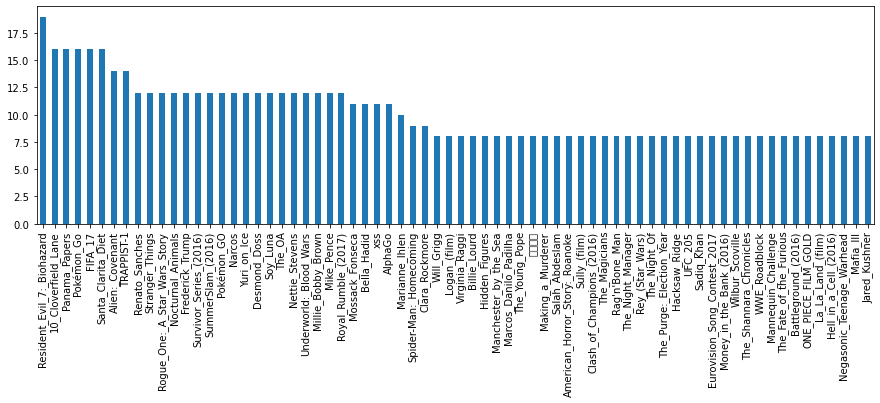

In [463]:
df[df.isnull().any(axis=1)]["title"].value_counts()[:70].plot(kind="bar", figsize=(15,4))

**<mark>Null rows have mostly</mark> `gaming category` titles**

In [464]:
df.dropna().shape[0]/df.shape[0]

0.7452279354487361

In [465]:
df.dropna(inplace=True)

In [466]:
df.shape

(108105, 554)

# 3. Exploratory Data Analysis <a id="eda"></a>

## 3.1 language: bar plot <a id="language_bar_plot"></a>

<AxesSubplot:>

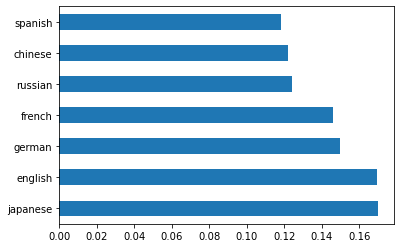

In [467]:
df["language"].value_counts(normalize=True).plot(kind="barh")

## 3.2 access_type: bar plot <a id="access_type_bar_plot"></a>

<AxesSubplot:>

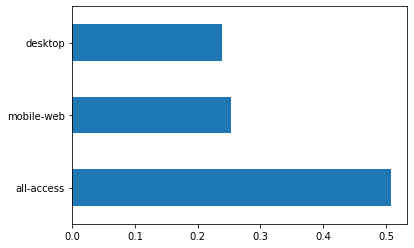

In [468]:
df["access_type"].value_counts(normalize=True).plot(kind="barh")

## 3.3 access origin: bar plot <a id="access_origin_plot"></a>

<AxesSubplot:>

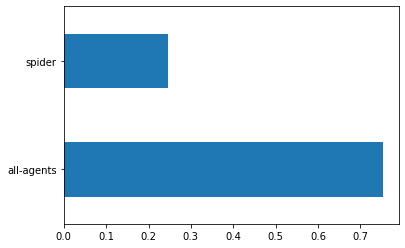

In [469]:
df["access_origin"].value_counts(normalize=True).plot(kind="barh")

# 4. Converting the data to a format that can be fed to the Arima model <a id="pivot_data"></a>

In [470]:
df.head(2)

,language,access_type,access_origin,title,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,chinese,all-access,spider,2NE1,18.0,11.0,5.0,13.0,14.0,9.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,chinese,all-access,spider,2PM,11.0,14.0,15.0,18.0,11.0,13.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0


In [471]:
df.columns[4:]

Index(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
       '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=550)

In [472]:
df_group = df.groupby(["language"])[df.columns[4:]].median()

In [473]:
data_TimeSeries = df_group.T

In [474]:
data_TimeSeries.index = np.vectorize(lambda x: np.datetime64(x))(data_TimeSeries.index)

In [475]:
data_TimeSeries.shape

(550, 7)

In [485]:
data_TimeSeries["exog"]=exog["Exog"].values

In [487]:
data_TimeSeries.tail()

language,chinese,english,french,german,japanese,russian,spanish,exog
2016-12-27,122.0,975.0,210.0,194.0,242.0,352.0,234.0,1
2016-12-28,122.0,944.0,211.0,196.0,230.0,337.0,242.0,1
2016-12-29,115.0,961.0,207.0,189.0,245.0,323.0,235.0,1
2016-12-30,113.0,922.0,211.0,182.0,252.0,294.0,209.0,0
2016-12-31,109.0,853.0,183.0,150.0,236.0,233.0,162.0,0


## 4.1 Time Series plot: all 7 languages <a id="ts_plot_all_seven"></a>

Text(0, 0.5, 'median_views')

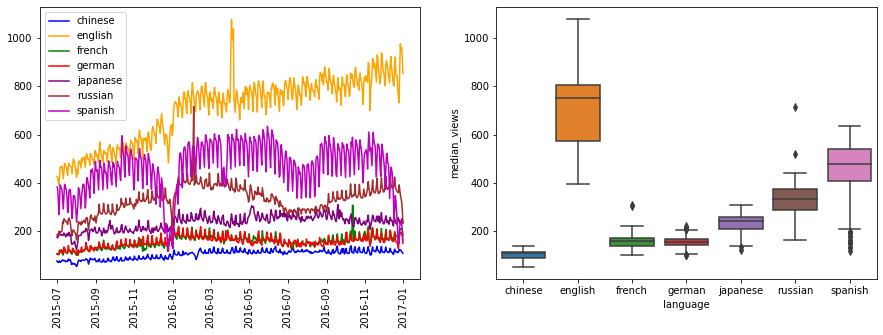

In [489]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
lang = list(data_TimeSeries.columns[:-1]); clr = ["blue","orange","green","red","purple","brown","m"]
for i in range(len(lang)):
    plt.plot(data_TimeSeries.index, data_TimeSeries[lang[i]], color=clr[i], label=lang[i])
plt.legend(); plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.boxplot(data=data_TimeSeries.reset_index().melt(id_vars=["index"],value_vars=data_TimeSeries.columns[:-1]).set_index("index"), y="value",x="language")
plt.ylabel("median_views")

In [631]:
data_TimeSeries.median(axis=0).sort_values(ascending=False)/data_TimeSeries.median(axis=0).sort_values(ascending=False).sum()

language
english     0.336551
spanish     0.214414
russian     0.149978
japanese    0.108217
french      0.071396
german      0.070049
chinese     0.049394
exog        0.000000
dtype: float64

<AxesSubplot:ylabel='language'>

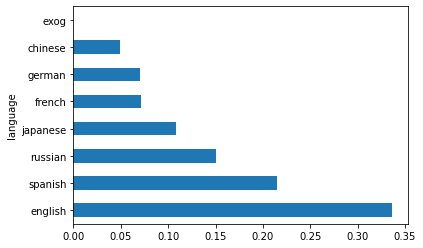

In [629]:
(data_TimeSeries.median(axis=0).sort_values(ascending=False)/data_TimeSeries.median(axis=0).sort_values(ascending=False).sum()).plot(kind="barh")

<mark>Most viewed page by languges are **english(33.65%), spanish(21.44%), russian(15%), japanese(10.8%), french(7.13%), german(7%), chinese(5%)**</mark>

# 5. Stationarity[ Augmented Dickey-Fuller (ADF) test ]: checking if the data is stationary <a id="checking_stationary"></a>

In [490]:
# import statsmodels.api as sm

In [491]:
sm.tsa.stattools.adfuller(data_TimeSeries["english"])

(-1.5337596068591977,
 0.5167497879782426,
 19,
 530,
 {'1%': -3.4427485933555886,
  '5%': -2.8670087381529723,
  '10%': -2.569682641509434},
 5062.231417057528)

In [492]:
for col in data_TimeSeries.columns[:-1]:
    pvalue = sm.tsa.stattools.adfuller(data_TimeSeries[col])[1]
    if pvalue >= 0.05:
        print(col,": Sequence is not stationary")
    else:
        print(col, ": Sequence is stationary")

chinese : Sequence is not stationary
english : Sequence is not stationary
french : Sequence is not stationary
german : Sequence is not stationary
japanese : Sequence is not stationary
russian : Sequence is not stationary
spanish : Sequence is stationary


**only spanish Time-Series data is stationary**

In [493]:
def adf_test(data, significance_level=0.05):
    pvalue = sm.tsa.stattools.adfuller(data)[1] 
    if pvalue <= significance_level:
        print('Sequence is stationary')
    else:
        print('Sequence is not stationary')

# 6. Decomposition and Differencing the time-series <a id="toc_6"></a>

## 6.1 Decomposition: time-series data "english" <a id="toc_6.1"></a>

In [494]:
model_decompose = sm.tsa.seasonal_decompose(data_TimeSeries["english"], model='additive')

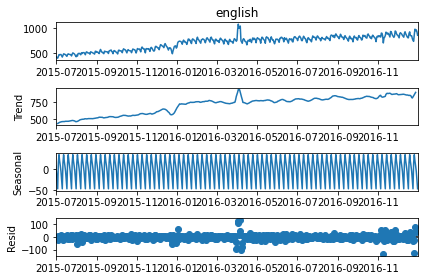

In [495]:
temp = model_decompose.plot()

<AxesSubplot:>

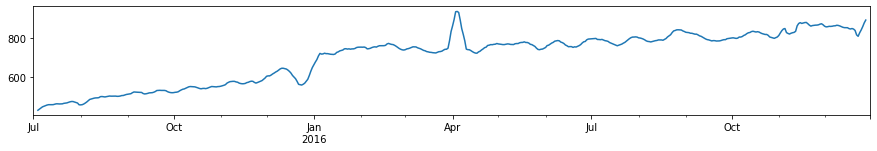

In [496]:
model_decompose.trend.plot(figsize=(15,2))

<AxesSubplot:>

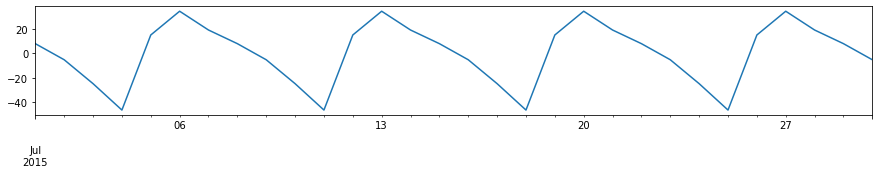

In [497]:
model_decompose.seasonal[:30].plot(figsize=(15,2))

<AxesSubplot:ylabel='Density'>

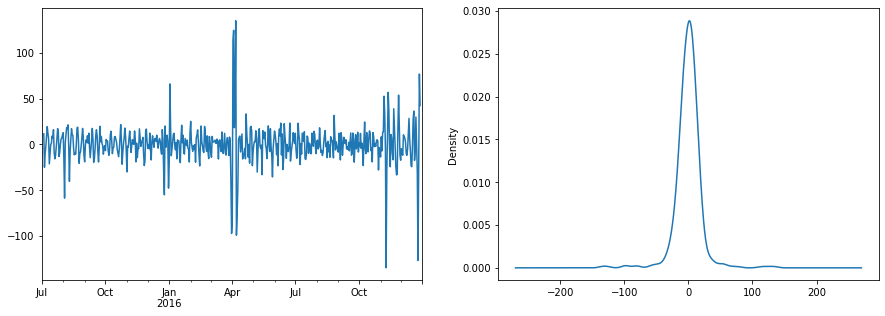

In [498]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
model_decompose.resid.plot()
plt.subplot(1,2,2)
model_decompose.resid.plot(kind="kde")

### Decomposition From Scratch

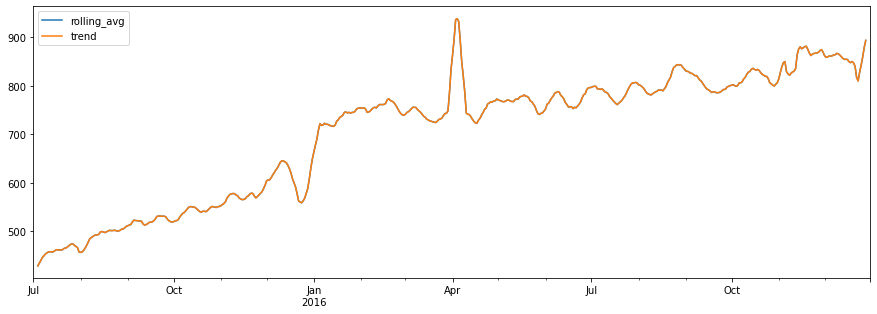

In [499]:
trend_temp = data_TimeSeries["english"].rolling(7, center=True).mean()  # temporary
plt.figure(figsize=(15,5))
trend_temp.plot(label="rolling_avg")
model_decompose.trend.plot()
plt.legend()

<AxesSubplot:>

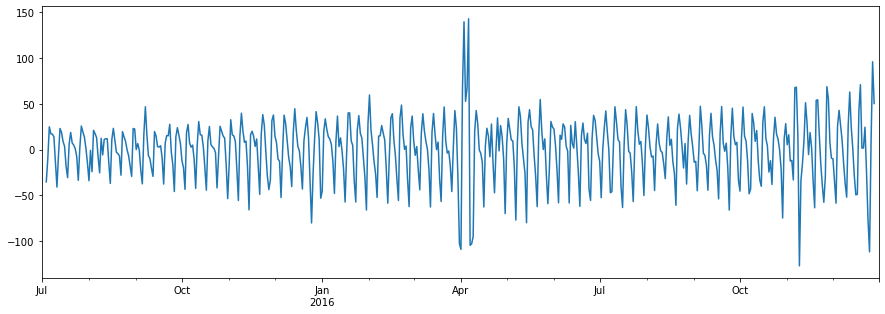

In [500]:
de_trend = data_TimeSeries["english"] - trend_temp
de_trend.plot(figsize=(15,5))

In [501]:
de_trend.reset_index().head()

,index,english
0,2015-07-01,NaN
1,2015-07-02,NaN
2,2015-07-03,NaN
3,2015-07-04,-35.142857
4,2015-07-05,-9.857143


<AxesSubplot:xlabel='index'>

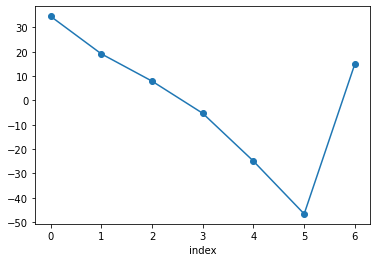

In [502]:
dtf = de_trend.reset_index()
dtf.groupby(dtf["index"].dt.day_of_week)['english'].mean().plot(style='-o')

<AxesSubplot:>

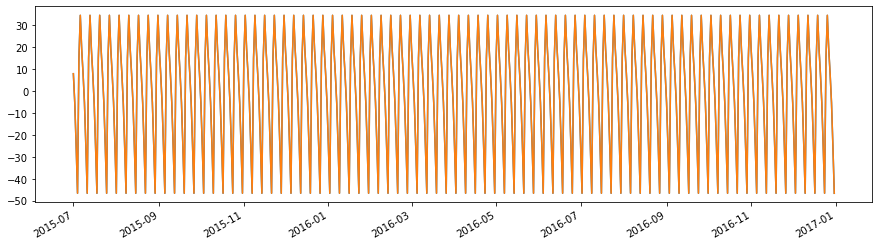

In [503]:
plt.figure(figsize=(15,4))
plt.plot(dtf["index"], dtf.groupby(dtf["index"].dt.day_of_week)['english'].transform('mean'))
model_decompose.seasonal.plot() #plots exactly fits

## 6.2 Differencing: time-series data "english" <a id="toc_6.2"></a>

<AxesSubplot:>

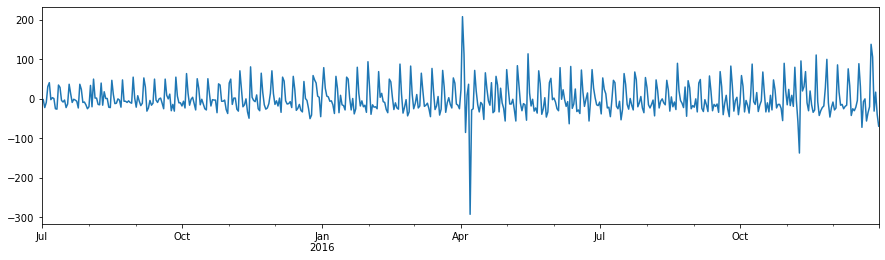

In [504]:
data_TimeSeries["english"].diff().plot(figsize=(15,4))

In [505]:
adf_test(data_TimeSeries["english"].diff().dropna())

Sequence is stationary


# 7. Plotting the ACF and PACF plots <a id="toc_7"></a>

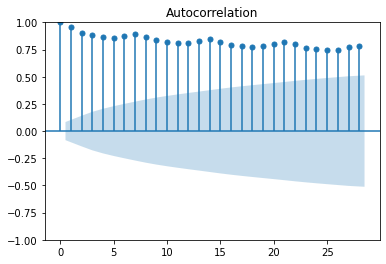

In [506]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
z = plot_acf(data_TimeSeries["english"])

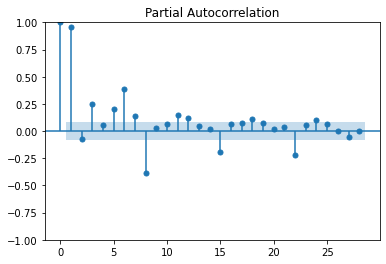

In [507]:
y = plot_pacf(data_TimeSeries["english"], lags = None)

# 8. Modelling <a id="toc_8"></a>

## 8.1 Train-Test-Split <a id="toc_8.1"></a>

In [508]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [509]:
train_x = data_TimeSeries.loc[data_TimeSeries.index[:-61]]

In [510]:
test_x = data_TimeSeries.loc[data_TimeSeries.index[-61:]]

In [511]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae, 
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3)) 
    print('MAPE:', round(mape(actual, predicted), 3))

## 8.2 Creating and training the Arima model <a id="toc_8.2"></a>

In [512]:
train_x["english"].head()

2015-07-01    427.0
2015-07-02    425.0
2015-07-03    403.0
2015-07-04    394.0
2015-07-05    425.0
Name: english, dtype: float64

In [513]:
adf_test(train_x["english"])

Sequence is not stationary


In [514]:
adf_test(train_x["english"].diff(1).dropna())

Sequence is stationary


In [515]:
pred = pd.DataFrame(index=test_x.index)

### <mark> **grid search**</mark>

In [516]:
ar = [8,9,10]
ma = [4,5,6]

In [517]:
result = []
for p in ar:
    for q in ma:
        model_temp = SARIMAX(train_x["english"], order=(p, 1, q))
        model_temp = model_temp.fit(disp=False)
        result.append([p,q,round(mape(test_x["english"], model_temp.forecast(steps=61)), 3)])

In [518]:
pd.DataFrame(result, columns=["p","q","mape"]).sort_values(by="mape",ascending=True)

,p,q,mape
4,9,5,0.067
1,8,5,0.068
2,8,6,0.068
5,9,6,0.068
8,10,6,0.068
7,10,5,0.074
3,9,4,0.077
6,10,4,0.080
0,8,4,0.081


**p=9,q=5 are best param**

In [519]:
model_ARIMA = SARIMAX(train_x["english"], order=(9, 1, 5)) 
model_ARIMA = model_ARIMA.fit(disp=False)

In [520]:
pred["english"] = model_ARIMA.forecast(steps=61)

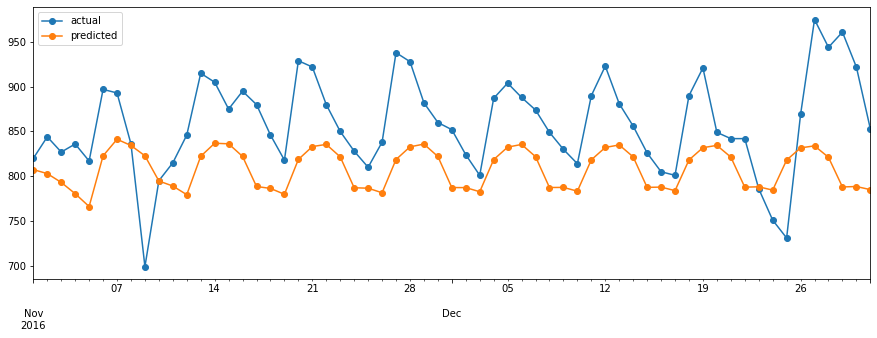

In [522]:
test_x["english"].plot(style="-o",figsize=(15,5), label="actual")
pred["english"].plot(style="-o",label="predicted")
plt.legend()

In [521]:
performance(test_x["english"], pred["english"])

MAE : 58.276
RMSE : 68.523
MAPE: 0.067


## 8.3 Getting the exogenous variable and using it to train a sarimax model <a id="toc_8.3"></a>

### <mark> **grid search**</mark>

In [533]:
ar_seasonal = [2,3]
ma_seasonal = [2,3]

result = []
exog_forecast = test_x[['exog']]  # requires two brackets to yield a shape of 2D
for P in ar_seasonal:
    for Q in ma_seasonal:
        model = SARIMAX(train_x["english"], exog=train_x['exog'], order=(9,1,5),seasonal_order=(P,1,Q,14))
        model = model.fit(disp=False)
        predictions_ = model.predict(start=test_x.index[0], end=test_x.index[-1], exog=exog_forecast).rename('Predictions')
        result.append([P,Q,round(mape(test_x["english"], predictions_), 3)])

In [535]:
pd.DataFrame(result, columns=["P","Q","mape"]).sort_values(by="mape",ascending=True)

,P,Q,mape
1,2,3,0.044
3,3,3,0.045
0,2,2,0.046
2,3,2,0.047


**P=2 & Q=3 are best param**

In [536]:
model = SARIMAX(train_x["english"], exog=train_x['exog'], order=(9,1,5),seasonal_order=(2,1,3,14))
model = model.fit(disp=False)

exog_forecast = test_x[['exog']]  # requires two brackets to yield a shape of 2D
predictions = model.predict(start=test_x.index[0], end=test_x.index[-1], exog=exog_forecast).rename('Predictions')

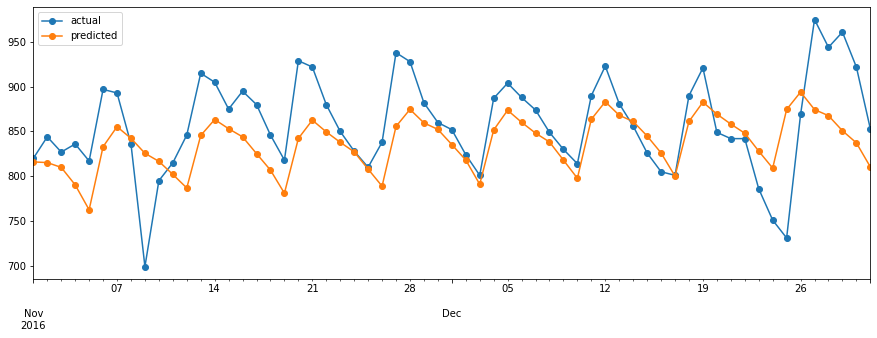

In [537]:
test_x["english"].plot(style="-o",figsize=(15,5), label="actual")
predictions.plot(style="-o",label="predicted")
plt.legend()

In [538]:
performance(test_x["english"], predictions)

MAE : 37.849
RMSE : 49.004
MAPE: 0.044


### 8.3.1 confidence interval - 95% <a id="toc_8.3.1"></a>

In [541]:
model.get_forecast(steps=61, exog=exog_forecast).conf_int(0.05).values[:5]

array([[772.27284207, 859.7437151 ],
       [757.05826355, 873.41305728],
       [744.97263165, 874.76207158],
       [718.09481343, 862.62045515],
       [684.41716777, 840.58823349]])

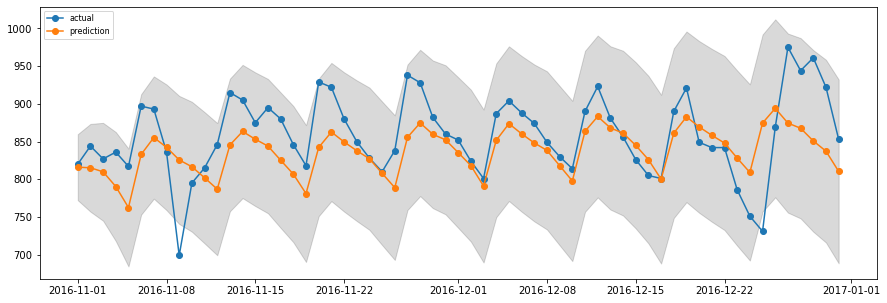

In [545]:
test_x[['lower', 'upper']] = model.get_forecast(steps=61, exog=exog_forecast).conf_int(0.1).values

plt.figure(figsize=(15,5))
# plt.plot(train_x['Sales'][-50:], '-o', label='training')
plt.plot(test_x['english'], '-o', label='actual')
plt.plot(predictions, '-o', label='prediction')
plt.fill_between(test_x.index, test_x['lower'], test_x['upper'], 
                 color='k', alpha=.15)
plt.legend(loc='upper left', fontsize=8)
plt.show()

## 8.4 Use facebook prophet for forecasting <a id="toc_8.4"></a>

**fbprophet relies on pystan , so please try installing pystan first and switch fbprophet to prophet (newer version)**

In [598]:
# !python -m pip install prophet

In [557]:
from prophet import Prophet

In [570]:
df_new = data_TimeSeries.reset_index().loc[:,["index","english","exog"]].rename(columns={"index":"ds","english":"y","exog":"holiday"})

In [571]:
df_new.head()

language,ds,y,holiday
0,2015-07-01,427.0,0
1,2015-07-02,425.0,0
2,2015-07-03,403.0,0
3,2015-07-04,394.0,0
4,2015-07-05,425.0,0


In [586]:
df_new.shape

(550, 3)

### 8.4.1 fbprophet without exog data

20:23:31 - cmdstanpy - INFO - Chain [1] start processing
20:23:31 - cmdstanpy - INFO - Chain [1] done processing


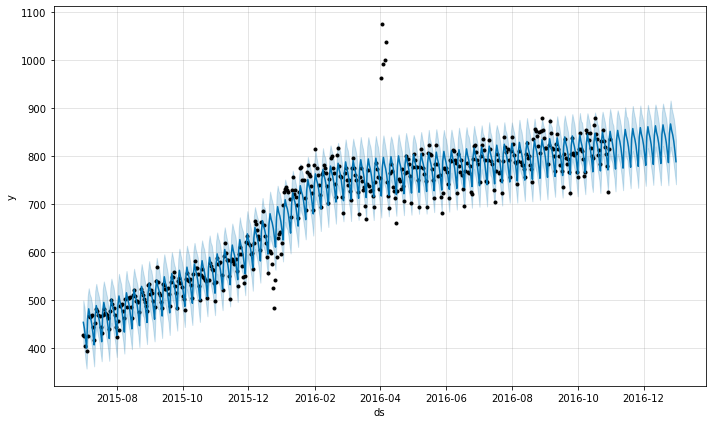

In [575]:
m = Prophet()
m.fit(df_new.loc[:,["ds","y"]][:-61])
future = m.make_future_dataframe(periods=61, freq='D')
forecast = m.predict(future)
m.plot(forecast);

In [578]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [579]:
forecast["yhat"].head()

0    453.178550
1    440.300029
2    421.474398
3    399.472621
4    461.065597
Name: yhat, dtype: float64

In [580]:
forecast["yhat"].shape

(550,)

In [584]:
pd.concat([df_new,forecast[["yhat"]]], axis=1).tail()

,ds,y,holiday,yhat
545,2016-12-27,975.0,1,853.340477
546,2016-12-28,944.0,1,843.944896
547,2016-12-29,961.0,1,830.386372
548,2016-12-30,922.0,0,810.880739
549,2016-12-31,853.0,0,788.198958


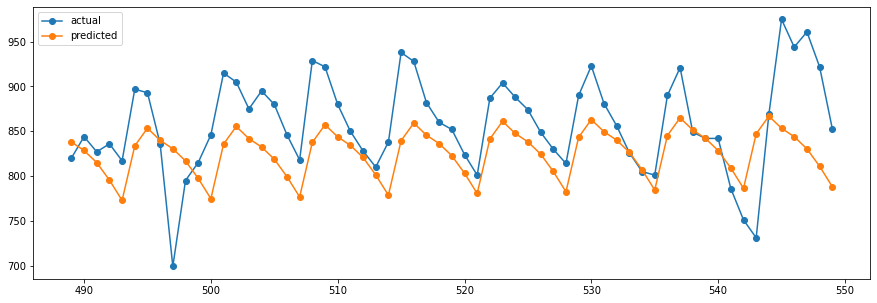

In [587]:
df_new["y"][-61:].plot(style="-o",figsize=(15,5), label="actual")
forecast["yhat"][-61:].plot(style="-o",label="predicted")
plt.legend()

In [585]:
performance(df_new["y"][-61:], forecast["yhat"][-61:])

MAE : 43.854
RMSE : 55.166
MAPE: 0.051


### 8.4.1 fbprophet with exog data

20:44:07 - cmdstanpy - INFO - Chain [1] start processing
20:44:07 - cmdstanpy - INFO - Chain [1] done processing


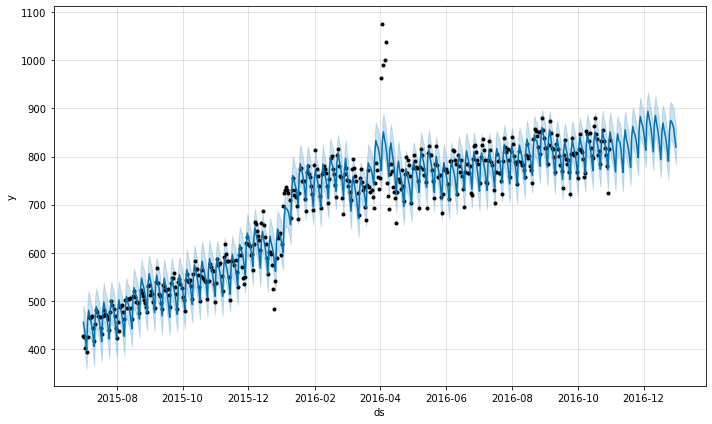

In [589]:
model2=Prophet(yearly_seasonality=True, weekly_seasonality=True)
model2.add_regressor('holiday') #adding holidays data in the model2
model2.fit(df_new[:-61])
forecast2 = model2.predict(df_new)
fig = model2.plot(forecast2)

In [591]:
forecast2.head(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-07-01,468.657180,420.166684,491.519120,468.657180,468.657180,-12.956410,-12.956410,-12.956410,0.0,...,9.483169,9.483169,9.483169,-22.439578,-22.439578,-22.439578,0.0,0.0,0.0,455.700770
1,2015-07-02,469.652176,401.097729,478.323585,469.652176,469.652176,-27.620181,-27.620181,-27.620181,0.0,...,-4.230810,-4.230810,-4.230810,-23.389370,-23.389370,-23.389370,0.0,0.0,0.0,442.031995


In [592]:
forecast2.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'extra_regressors_additive', 'extra_regressors_additive_lower',
       'extra_regressors_additive_upper', 'holiday', 'holiday_lower',
       'holiday_upper', 'weekly', 'weekly_lower', 'weekly_upper', 'yearly',
       'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [593]:
forecast2["yhat"].head()

0    455.700770
1    442.031995
2    422.410546
3    399.746336
4    460.810613
Name: yhat, dtype: float64

In [594]:
forecast2["yhat"].shape

(550,)

In [595]:
pd.concat([df_new,forecast2[["yhat"]]], axis=1).tail()

,ds,y,holiday,yhat
545,2016-12-27,975.0,1,872.012168
546,2016-12-28,944.0,1,866.591132
547,2016-12-29,961.0,1,857.868277
548,2016-12-30,922.0,0,836.504946
549,2016-12-31,853.0,0,819.803709


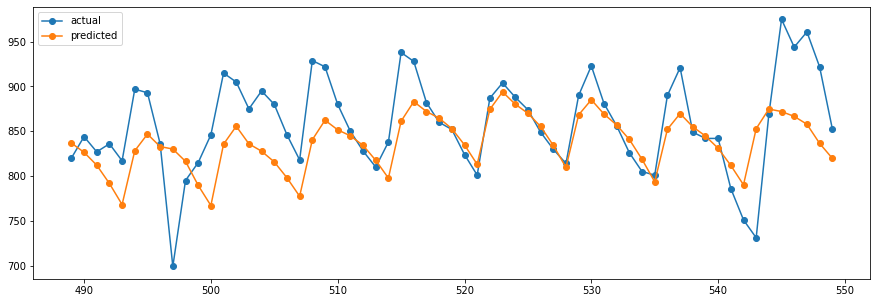

In [596]:
df_new["y"][-61:].plot(style="-o",figsize=(15,5), label="actual")
forecast2["yhat"][-61:].plot(style="-o",label="predicted")
plt.legend()

In [597]:
performance(df_new["y"][-61:], forecast2["yhat"][-61:])

MAE : 35.454
RMSE : 48.179
MAPE: 0.041


# 9. `Metrics summary` of different models for `"english" data` <a id="toc_9"></a>

### **<mark>ARIMA model</mark>**

In [599]:
performance(test_x["english"], pred["english"])

MAE : 58.276
RMSE : 68.523
MAPE: 0.067


### **<mark>SARIMAX model</mark>**

In [600]:
performance(test_x["english"], predictions)

MAE : 37.849
RMSE : 49.004
MAPE: 0.044


### **<mark>prophet model</mark> without exog data**

In [601]:
performance(df_new["y"][-61:], forecast["yhat"][-61:])

MAE : 43.854
RMSE : 55.166
MAPE: 0.051


### **<mark>prophet model</mark> with exog data**

In [602]:
performance(df_new["y"][-61:], forecast2["yhat"][-61:])

MAE : 35.454
RMSE : 48.179
MAPE: 0.041


# 10. Defining functions for all of the tasks <a id="toc_10"></a>

In [615]:
def funct_performance(lang, train_x, test_x):
    model4 = SARIMAX(train_x[lang], exog=train_x['exog'], order=(9,1,5),seasonal_order=(2,1,3,14))
    model4 = model4.fit(disp=False)

    exog_forecast4 = test_x[['exog']]  # requires two brackets to yield a shape of 2D
    predictions4 = model4.predict(start=test_x.index[0], end=test_x.index[-1], exog=exog_forecast4).rename('Predictions')
    print("--"*50);print("Metrics for {}".format(lang))
    performance(test_x[lang], predictions4) #it already has print func

## 10.1 Comparing results for all languages <a id="toc_10.1"></a>

In [618]:
for language in train_x.columns[:-1]:
    funct_performance(language, train_x, test_x)

----------------------------------------------------------------------------------------------------
Metrics for chinese
MAE : 6.482
RMSE : 7.927
MAPE: 0.057
----------------------------------------------------------------------------------------------------
Metrics for english
MAE : 37.849
RMSE : 49.004
MAPE: 0.044
----------------------------------------------------------------------------------------------------
Metrics for french
MAE : 13.336
RMSE : 17.855
MAPE: 0.073
----------------------------------------------------------------------------------------------------
Metrics for german
MAE : 10.318
RMSE : 13.715
MAPE: 0.06
----------------------------------------------------------------------------------------------------
Metrics for japanese
MAE : 9.395
RMSE : 11.734
MAPE: 0.039
----------------------------------------------------------------------------------------------------
Metrics for russian
MAE : 20.237
RMSE : 28.806
MAPE: 0.057
---------------------------------------------

# 11. Inferences and recommendations <a id="toc_11"></a>

## 11.1 observations <a id="toc_11.1"></a>

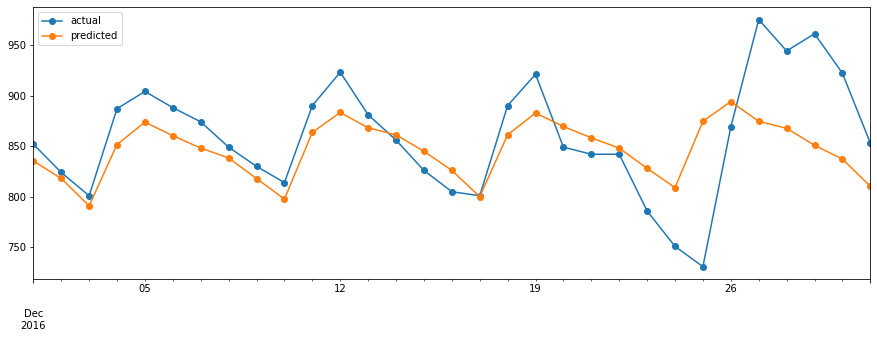

In [635]:
test_x["english"][-31:].plot(style="-o",figsize=(15,5), label="actual")
predictions[-31:].plot(style="-o",label="predicted")
plt.legend()

In [655]:
pd.DataFrame({"actual":test_x["english"][-31:],"predicted":predictions[-31:],"days":pd.Series(test_x["english"][-31:].index).dt.day_name().values})[:20].T

,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20
actual,852.0,824.0,801.0,887.0,904.0,888.0,874.0,849.0,830.0,814.0,890.0,923.0,881.0,856.0,826.0,805.0,801.0,890.0,921.0,849.0
predicted,835.370389,818.093374,791.007066,851.611764,873.725862,860.261111,848.131993,838.276378,818.01238,797.739022,863.583159,883.233019,868.090995,861.143687,844.946537,826.015487,800.1062,861.170245,882.754949,869.401904
days,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday


1. <mark>Viewers on page is `very low during` **Thursday, Friday, Saturday**</mark>

2. <mark>Viewers on page is `very high during` **Sunday, Monday, Tuesday**</mark>

3. <mark>Viewers on page is `average on` **Wednesday**</mark>

4. <mark>Most viewed page by languges are **english(33.65%), spanish(21.44%), russian(15%), japanese(10.8%), french(7.13%), german(7%), chinese(5%)**</mark>

## 11.2 recommendations <a id="toc_11.2"></a>

1. <mark>Ads should be shown only during **Sunday, Monday, Tuesday and Wednesday** as these days have highest and average viewers on page and it's periodic by osbservations of predicted data</mark>

2. <mark>Ads budget should be divided in proportion to percentage of viewers page-language wise, for example english-pages have the most viewers and chinese-pages have least viewers so maximum part of budget should be allocated for english page and minimum part of budget should be allocated for chinese page</mark>

# 12. Questionnaire <a id="toc_12"></a>

    1. Defining the problem statements and where can this and modifications of this be used?
    2. Write 3 inferences you made from the data visualizations
    3. What does the decomposition of series do?
    4. What level of differencing gave you a stationary series?
    5. Difference between arima, sarima & sarimax.
    6. Compare the number of views in different languages
    7. What other methods other than grid search would be suitable to get the model for all languages?

1. Defining the problem statements and where can this and modifications of this be used?
**Ans:** Forecasting the number of views to predict and optimize the ad placement.
         This method of forecasting can be used to predict no. of customers on offer/sales day to optimise the revenue as well          as manage the resources.

2. Write 3 inferences you made from the data visualizations
**Ans:**<br>
- 2.1. <mark>Most viewed page by languges are **english(33.65%), spanish(21.44%), russian(15%), japanese(10.8%), french(7.13%), german(7%), chinese(5%)**</mark>
- 2.2.    **access_type:** all-access(50%), mobile-web(25.37%), desktop(23.85%)
- 2.3.    **access-origin:** all-agents(75.30%), spider(24.69%)

3. What does the decomposition of series do?
**Ans:** It decomposes the series in three parts **trend, sesonality and residuals**

4. What level of differencing gave you a stationary series?
**Ans:** 1-level of differentiation

5. Difference between arima, sarima & sarimax
**Ans:** 
- ARIMA models can handle trend but can't handle sesonality and exogenous data
- SARIMA model can handle trend and seasonality but can't handle exogenous data
- SARIMAX model can handle trend, seasonality and exogenous data but one of the drawbacks of the SARIMAX Model is that one cannot have multiple seasonality

6. Compare the number of views in different languages
**Ans:** <mark>Most viewed page by languges are **english(33.65%), spanish(21.44%), russian(15%), japanese(10.8%), french(7.13%), german(7%), chinese(5%)**</mark>

7. What other methods other than grid search would be suitable to get the model for all languages?
**Ans:** creating own custom methods would be suitable to get the model for all languages